In [ ]:
# install dependencies: #安裝依賴項
!pip install pyyaml==5.1 pycocotools>=2.0.1
#yaml類似於XML，但是語法比XML簡單得多，pyymal是yaml的Python實現，使用5.1版本
import torch, torchvision
#import(匯入模組) torch(深度學習框架)，torchvision(是一個和torch配合使用的Python包，提供了幾個常用數據集)
print(torch.__version__, torch.cuda.is_available())
##輸出(可查看torch的版本,可查看電腦的GPU能否被PyTorch調用，結果顯示True或False)
!gcc --version ##安裝GCC編譯器
# opencv is pre-installed on colab (opencv已預先安裝在colab上)

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
#Python中assert語句通常用來對程式碼進行必要的檢查，確定某種情況一定發生，或者一定不會發生，檢查是不是1.6
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
# -f, --find-links <url>，解析該html文件以獲取安裝

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


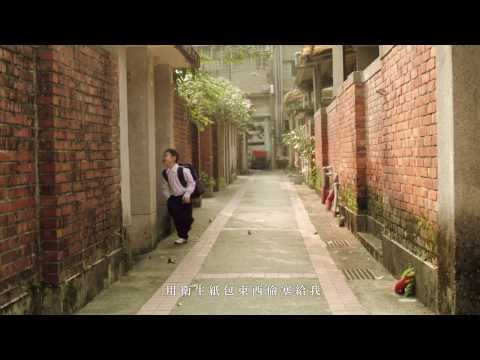

In [ ]:
# This is the video we're going to process #我們要處理的影片
from IPython.display import YouTubeVideo, display #從YT嵌入一個影片
video = YouTubeVideo("T_uFMQGCZYg", width=500) # ("影片網址那串代碼",寬度=500)
display(video) #顯示

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing 安裝依賴項，下載視頻，裁剪5秒鐘進行處理
!pip install youtube-dl #安裝可以下載YT影片的套件
!pip uninstall -y opencv-python-headless opencv-contrib-python #移除
!apt install python3-opencv  # the one pre-installed have some issues
#!youtube-dl https://www.youtube.com/watch?v=ll8TgCZ0plk -f 22 -o video.mp4
!youtube-dl https://www.youtube.com/watch?v=T_uFMQGCZYg -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
[youtube] T_uFMQGCZYg: Downloading webpage
[download] video.mp4 has already been downloaded
[download] 100% of 16.66MiB
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enabl

In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

fatal: destination path 'detectron2' already exists and is not an empty directory.
Failed to load OpenCL runtime
[10/27 06:09:45 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='video-output.mkv', video_input='video-clip.mp4', webcam=False)
[10/27 06:09:50 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[10/27 06:09:50 fvcore.common.file_io]: URL https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl cached in /root/.torch/fvcore_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl
[10/27 06:09:50 fvcore.common.checkpoint]: Reading a file from '

In [ ]:
# Download the results
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>